# 1. 인구 피라미드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 방지

In [2]:
file_name = '201201_201201_연령별인구현황_월간.xlsx'
yeas = '2012'
df_m = pd.read_excel(file_name,
                     skiprows=3,
                     index_col='행정기관',
                     usecols='B, E:Y')
df_m.head(3)

C:\Users\CHAN_LEE\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"1,196,298","1,215,642","1,627,682","1,878,394","1,692,322","1,798,832","2,058,717","2,151,718","2,346,348","2,171,235",...,"1,608,133","1,139,681","885,678","719,811","437,707","194,827","77,608","22,964","4,766","2,691"
서울특별시,"216,843","212,597","282,790","344,798","337,696","421,899","475,109","452,897","463,064","412,326",...,"334,448","240,777","190,839","139,263","74,020","32,185","13,282","4,663","1,203",907
부산광역시,"67,475","69,137","99,796","128,970","123,263","126,669","138,762","134,439","148,476","145,068",...,"137,184","100,614","73,804","55,002","29,768","12,274","4,325","1,141",244,230


In [3]:
df_m.iloc[0] = df_m.iloc[0].str.replace(',','').astype(int) # 1,1,95,951 -> 1195951 (정수형)

In [4]:
df_m.iloc[0]

0~4세       1196298
5~9세       1215642
10~14세     1627682
15~19세     1878394
20~24세     1692322
25~29세     1798832
30~34세     2058717
35~39세     2151718
40~44세     2346348
45~49세     2171235
50~54세     2182972
55~59세     1608133
60~64세     1139681
65~69세      885678
70~74세      719811
75~79세      437707
80~84세      194827
85~89세       77608
90~94세       22964
95~99세        4766
100세 이상       2691
Name: 전국  , dtype: object

In [5]:
df_w = pd.read_excel(file_name,
                     skiprows=3,
                     index_col='행정기관',
                     usecols='B, AB:AV')
df_w.head(3)

C:\Users\CHAN_LEE\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0~4세.1,5~9세.1,10~14세.1,15~19세.1,20~24세.1,25~29세.1,30~34세.1,35~39세.1,40~44세.1,45~49세.1,...,55~59세.1,60~64세.1,65~69세.1,70~74세.1,75~79세.1,80~84세.1,85~89세.1,90~94세.1,95~99세.1,100세 이상.1
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"1,128,024","1,126,625","1,492,152","1,659,937","1,525,305","1,691,682","1,975,775","2,068,220","2,277,052","2,051,092",...,"1,624,628","1,189,414","1,009,513","933,302","700,197","429,811","208,227","73,481","19,130","9,067"
서울특별시,"205,591","199,837","260,917","309,366","333,116","431,682","466,958","437,616","460,637","408,707",...,"361,120","258,846","205,704","159,556","108,150","67,410","34,724","13,038","3,930","2,718"
부산광역시,"64,052","64,215","89,346","109,301","109,765","118,838","132,634","130,434","152,203","148,289",...,"143,244","105,702","79,870","68,449","47,084","28,764","13,212","4,138","1,169",848


In [6]:
df_w.columns

Index(['0~4세.1', '5~9세.1', '10~14세.1', '15~19세.1', '20~24세.1', '25~29세.1',
       '30~34세.1', '35~39세.1', '40~44세.1', '45~49세.1', '50~54세.1', '55~59세.1',
       '60~64세.1', '65~69세.1', '70~74세.1', '75~79세.1', '80~84세.1', '85~89세.1',
       '90~94세.1', '95~99세.1', '100세 이상.1'],
      dtype='object')

In [7]:
df_w.columns = df_m.columns # 컬럼명 통일
df_w.columns

Index(['0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세',
       '35~39세', '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세',
       '70~74세', '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상'],
      dtype='object')

In [8]:
df_w.iloc[0] = df_w.iloc[0].str.replace(',','').astype(int) # 1,1,95,951 -> 1195951 (정수형)
df_w.iloc[0]

0~4세       1128024
5~9세       1126625
10~14세     1492152
15~19세     1659937
20~24세     1525305
25~29세     1691682
30~34세     1975775
35~39세     2068220
40~44세     2277052
45~49세     2051092
50~54세     2144177
55~59세     1624628
60~64세     1189414
65~69세     1009513
70~74세      933302
75~79세      700197
80~84세      429811
85~89세      208227
90~94세       73481
95~99세       19130
100세 이상       9067
Name: 전국  , dtype: object

## 데이터 시각화

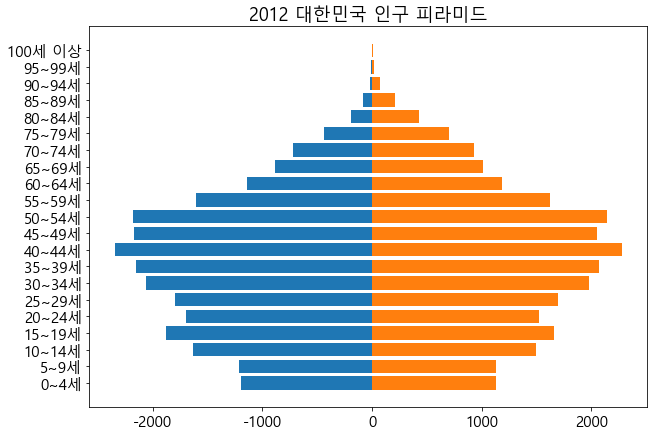

In [9]:
plt.figure(figsize=(10, 7))
plt.barh(df_m.columns, -df_m.iloc[0] // 1000 ) # 단위 ; 천명
plt.barh(df_w.columns, df_w.iloc[0] // 1000 )
plt.title('%s 대한민국 인구 피라미드'%(yeas))
plt.savefig('%s_인구피라미드.png'%(yeas), dpi=100)
plt.show()